## Czesc 1.

In [1]:
from sklearn.datasets import make_regression
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
from time import time_ns

In [2]:
random_state = 244827
n_samples = 2427

In [3]:
x, true_y = make_regression(n_features=1, random_state=random_state, n_samples=n_samples, noise=16)

Wygenerowane dane prezentują się w następujący sposób

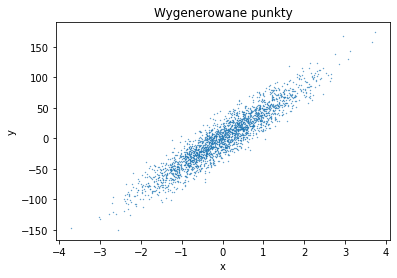

In [4]:
plt.scatter(x, true_y, s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Wygenerowane punkty")

plt.show()

In [5]:
def f(w):
    return w[0] + x * w[1]

Obliczenie wspolczynników dla funkcji

In [6]:
ana_start = time_ns()
for i in range(100):
    a = np.concatenate((np.ones((n_samples, 1)), x), 1)
    at = np.transpose(a)
    w = np.matmul(np.matmul(np.linalg.inv(np.matmul(at, a)), at), true_y)

In [7]:
predicted_y_analytical = f(w)

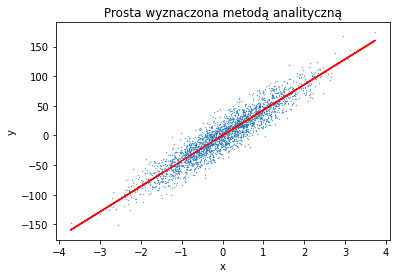

In [8]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_analytical, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metodą analityczną")
plt.show()

Funkcja strat dla metody numerycznej

In [9]:
def numerical_loss(w):
    ret = true_y - np.matmul(a, w)
    ret = np.matmul(ret.transpose(), ret)
    return 1/n_samples * ret

Poczatkowe wspolczynniki

In [10]:
start = np.ones((2,1))
minimized = minimize(numerical_loss, start, method='Powell')
predicted_y_numerical = f(minimized.x)

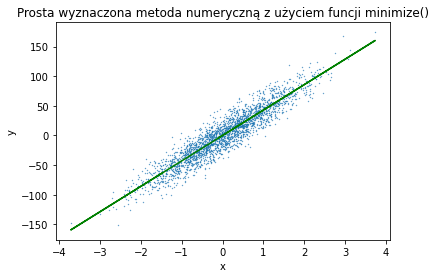

In [11]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Prosta wyznaczona metoda numeryczną z użyciem funcji minimize()")
plt.show()

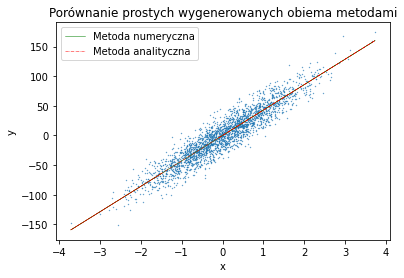

In [12]:
plt.scatter(x, true_y, s=0.1)
plt.plot(x, predicted_y_numerical, c='g', label='Metoda numeryczna', lw=0.5, ls='-')
plt.plot(x, predicted_y_analytical, c='r', label='Metoda analityczna', lw=0.5, ls='-.')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Porównanie prostych wygenerowanych obiema metodami")
plt.legend()
plt.rcParams['figure.figsize'] = [20, 10]
plt.show()


In [13]:
avg_sqr_err_num = np.mean((predicted_y_numerical - true_y) ** 2)
avg_sqr_err_an = np.mean((predicted_y_analytical - true_y) ** 2)


In [14]:
print(f'Metoda numeryczna osiągneła MSE większy o {avg_sqr_err_num - avg_sqr_err_an} od metody analitycznej')

Metoda numeryczna osiągneła MSE większy o 8.711276677786373e-08 od metody analitycznej


## Część 2.


In [15]:
from numpy import genfromtxt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from time import time_ns

In [227]:
def f_wielomian(w, x):
    return np.sum(np.matmul(x, w), axis=1)

In [241]:
def make_X(X, n, x):
    for i in range(1, n+1):
        X = np.concatenate((X, np.power(x, i)), axis=1)
    return X

In [242]:
def weights_analytical(X, y):
    XT = np.transpose(X)
    XTX = np.matmul(XT, X)
    XTXI = np.linalg.inv(XTX)
    XY = np.matmul(XT, y)
    W = np.matmul(XTXI, XY)
    return W


In [243]:
def MSE(predicted, true):
    return np.mean((predicted - true)**2)

In [248]:
def flap_py_comparision(x, y):

    predicted_y_analytical9 = []
    start_9_an = time_ns()
    for i in range(100):
        X1 = (np.ones((len(x), 1)))
        X1 = make_X(X1, 9, x)
        w = weights_analytical(X1, y)
        predicted_y_analytical9 = f_wielomian(w, X1)
    stop_9_an = time_ns()

    predicted_y_analytical21 = []
    start_21_an = time_ns()
    for i in range(100):
        X2 = (np.ones((len(x), 1)))
        X2 = make_X(X2, 21, x)
        w = weights_analytical(X2, y)
        predicted_y_analytical21 = f_wielomian(w, X2)
    stop_21_an = time_ns()

    y_sk_21 = []
    start_21_sk = time_ns()
    for i in range(100):
        poly21 = PolynomialFeatures(21)
        x_sk_21 = poly21.fit_transform(x)
        reg = LinearRegression().fit(x_sk_21, y)
        y_sk_21 = reg.predict(x_sk_21)
    stop_21_sk = time_ns()

    y_sk_9 = []
    start_9_sk = time_ns()
    for i in range(100):
        poly9 = PolynomialFeatures(9)
        x_sk_9 = poly9.fit_transform(x)
        reg = LinearRegression().fit(x_sk_9, y)
        y_sk_9 = reg.predict(x_sk_9)
    stop_9_sk = time_ns()

    plt.scatter(x, y, label='Punkty ze zbioru')
    plt.plot(x, predicted_y_analytical9, c='r', label='Metoda analityczna 9. stopnia')
    plt.plot(x, y_sk_9, c='b', label='sklearn LinearRegression 9. stopnia')
    plt.plot(x, predicted_y_analytical21, c='m', label='Metoda analityczna 21. stopnia')
    plt.plot(x, y_sk_21, c='g', label='sklearn LinearRegression 21. stopnia')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("Krzywe wyznaczone różnymi metodami")
    plt.legend()
    plt.show()

    print(f'Metoda analityczna uzyskała błąd średniokwadratowy równy {MSE(predicted_y_analytical9, y)}, dla wielomianu 9. stopnia i działał średnio {(stop_9_an - start_9_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał błąd średniokwadratowy równy {MSE(y_sk_9, y)}, dla wielomianu 9. stopnia i działał średnio {(stop_9_sk - start_9_sk) / 100} nanosekund')

    print(f'Metoda analityczna uzyskała błąd średniokwadratowy równy {MSE(predicted_y_analytical21, y)}, dla wielomianu 21. stopnia i działał średnio {(stop_21_an - start_21_an) / 100} nanosekund')
    print(f'Model LinearRegression uzyskał błąd średniokwadratowy równy {MSE(y_sk_21, y)}, dla wielomianu 21. stopnia i działał średnio {(stop_21_sk - start_21_sk) / 100} nanosekund')

In [245]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

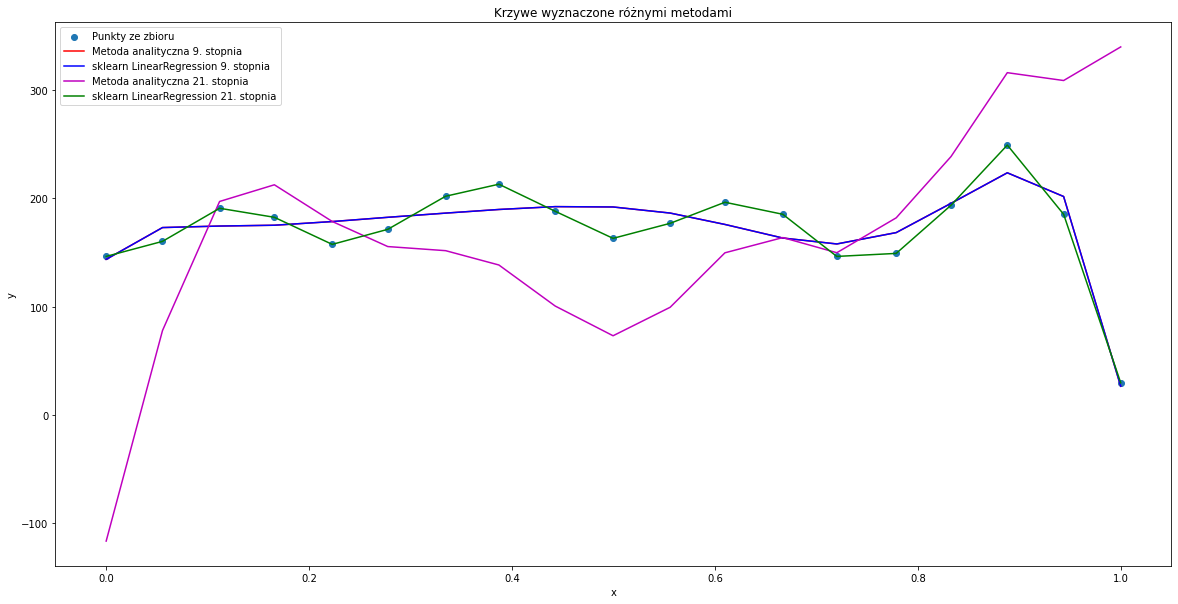

Metoda analityczna uzyskała błąd średniokwadratowy równy 3222.9253428150832, dla wielomianu 9. stopnia i działał średnio 104158.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 270.13272863663, dla wielomianu 9. stopnia i działał średnio 352156.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy równy 11736.17347316725, dla wielomianu 21. stopnia i działał średnio 238075.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 8.710571343599383e-09, dla wielomianu 21. stopnia i działał średnio 426565.0 nanosekund


In [249]:
zbior1 = genfromtxt('zbior1.csv', delimiter=',', dtype=np.float64)
x1, y1 = zbior1[:, 0], zbior1[:, 1]
x1 = x1.reshape((len(x1), 1))
y1 = y1.reshape((len(y1), 1))
x1 = norm(x1)

flap_py_comparision(x1, y1)

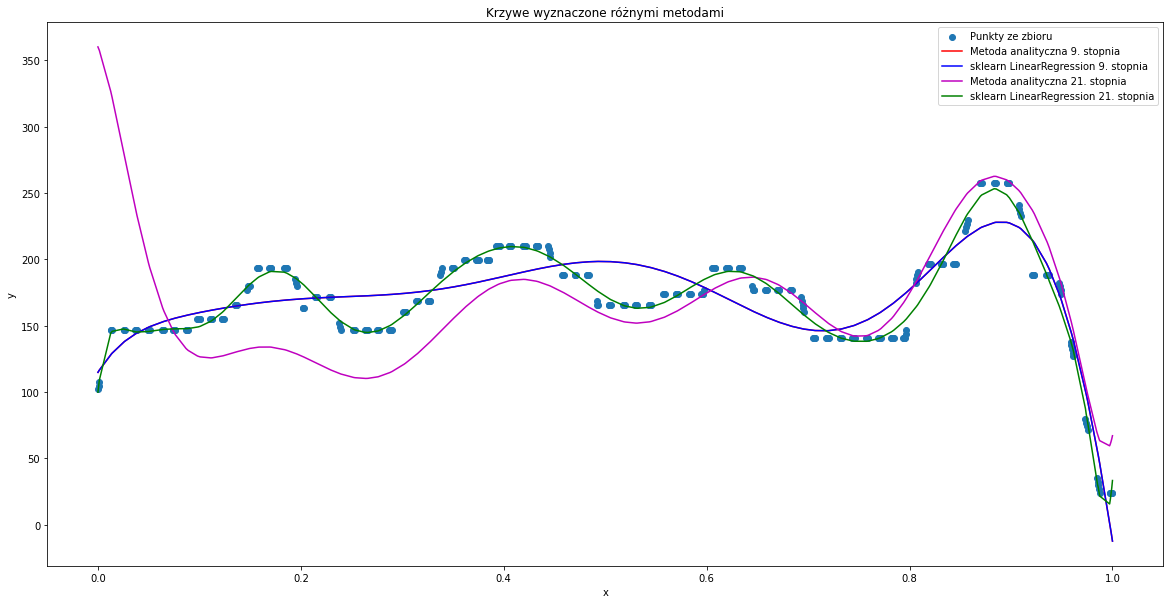

Metoda analityczna uzyskała błąd średniokwadratowy równy 2757.9477945668305, dla wielomianu 9. stopnia i działał średnio 198396.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 352.67090455066653, dla wielomianu 9. stopnia i działał średnio 391845.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy równy 3871.493380488027, dla wielomianu 21. stopnia i działał średnio 496000.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 51.935407482433114, dla wielomianu 21. stopnia i działał średnio 550558.0 nanosekund


In [267]:
zbior2 = genfromtxt('zbior2.csv', delimiter=',', dtype=np.float64)
x2, y2 = zbior2[:, 0], zbior2[:, 1]
x2 = x2.reshape((len(x2), 1))
y2 = y2.reshape((len(y2), 1))
x2 = norm(x2)

flap_py_comparision(x2, y2)


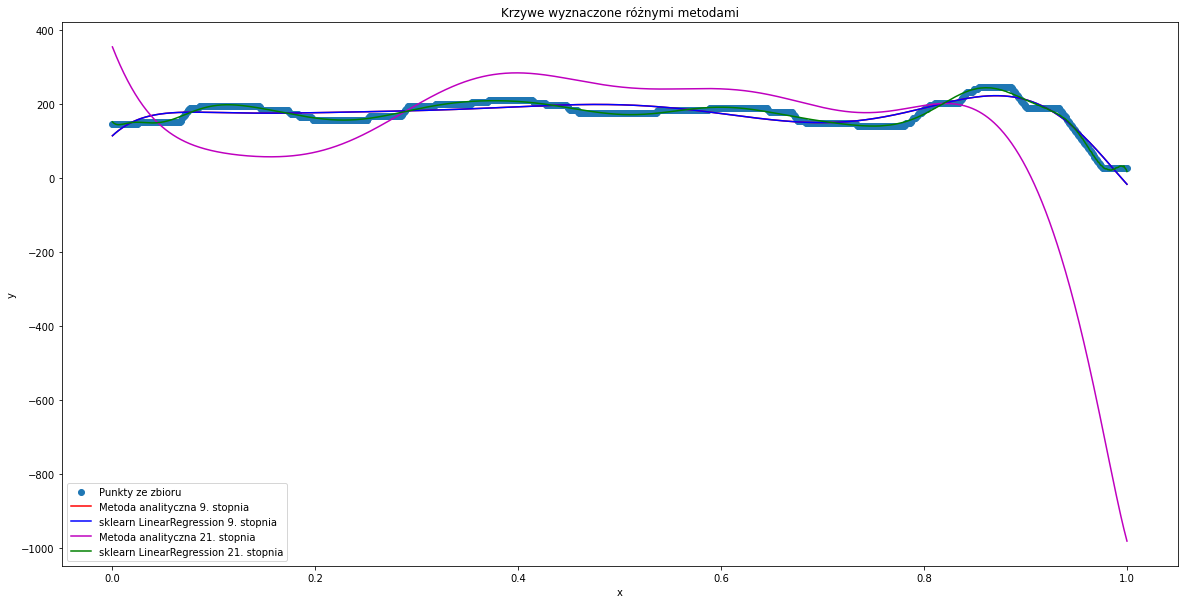

Metoda analityczna uzyskała błąd średniokwadratowy równy 2560.119268548451, dla wielomianu 9. stopnia i działał średnio 533234.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 287.02787542234137, dla wielomianu 9. stopnia i działał średnio 922039.0 nanosekund
Metoda analityczna uzyskała błąd średniokwadratowy równy 49490.182543752024, dla wielomianu 21. stopnia i działał średnio 1263036.0 nanosekund
Model LinearRegression uzyskał błąd średniokwadratowy równy 31.02359773603665, dla wielomianu 21. stopnia i działał średnio 1116003.0 nanosekund


In [252]:
zbior3 = genfromtxt('zbior3.csv', delimiter=',', dtype=np.float64)
x3, y3 = zbior3[:, 0], zbior3[:, 1]
x3 = x3.reshape((len(x3), 1))
y3 = y3.reshape((len(y3), 1))
x3 = norm(x3)

flap_py_comparision(x3, y3)

## Część 3.

In [259]:
def make_X_ridge(x, n):
    for i in range(2, n+1):
        x = np.concatenate((x, np.power(x, i)), 1)
    return x

In [262]:
print(x1)

[[0.        ]
 [0.05551331]
 [0.11178707]
 [0.16577947]
 [0.22281369]
 [0.27756654]
 [0.33460076]
 [0.38707224]
 [0.44258555]
 [0.49961977]
 [0.55589354]
 [0.60988593]
 [0.66692015]
 [0.72015209]
 [0.77870722]
 [0.83269962]
 [0.88821293]
 [0.94372624]
 [1.        ]]


In [260]:

X_ridge = x1
X_ridge = make_X_ridge(X_ridge, 16)


In [261]:
print(X_ridge.shape)

(19, 32768)
